# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [29]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [31]:
import os
os.getcwd()

'/data/ephemeral/home/code'

In [9]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '../data/train.csv'
test_path  = '../data/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [11]:
dt_test.shape
# dt['Í≥ÑÏïΩÎÖÑÏõî'].value_counts()

(9272, 52)

In [10]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1

concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [12]:
concat['is_test'].value_counts()

0    1118822
1       9272
Name: is_test, dtype: int64

In [13]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

In [14]:
# Ï£ºÏÜåÎ°ú unique idÎ•º ÎßåÎì§Ïñ¥Î¥ÖÎãàÎã§

concat['Î≥∏Î≤à'] = concat['Î≥∏Î≤à'].fillna(-1)
concat['Î∂ÄÎ≤à'] = concat['Î∂ÄÎ≤à'].fillna(-1)

concat['Î≥∏Î≤à'] = concat['Î≥∏Î≤à'].astype(int).astype(str).replace({-1: np.nan})
concat['Î∂ÄÎ≤à'] = concat['Î∂ÄÎ≤à'].astype(int).astype(str).replace({-1: np.nan})

concat['ÏßÄÎ≤à_temp'] = concat['Î≥∏Î≤à'] + '-' + concat['Î∂ÄÎ≤à']

concat['Î≤àÏßÄ'] = concat['Î≤àÏßÄ'].fillna(concat['ÏßÄÎ≤à_temp'])
concat['Î≤àÏßÄ'].isnull().sum()

concat = concat.drop('ÏßÄÎ≤à_temp', axis=1)

In [15]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat['Î≥∏Î≤à'] = concat['Î≥∏Î≤à'].astype('str')
concat['Î∂ÄÎ≤à'] = concat['Î∂ÄÎ≤à'].astype('str')


# 'ÏãúÍµ∞Íµ¨'ÏôÄ 'Î≤àÏßÄ'Î•º Ïù¥Ïö©Ìï¥ unique idÎ•º ÎßåÎì§Ïñ¥Ï§ÄÎã§
concat['Ï£ºÏÜå'] = concat['ÏãúÍµ∞Íµ¨'] + ' ' + concat['Î≤àÏßÄ']

### xyÏ¢åÌëú Í≤∞Ï∏°ÏπòÎ•º Ï†úÍ±∞Ìï¥Î¥ÖÎãàÎã§

In [16]:
concat['is_test'].value_counts()

0    1118822
1       9272
Name: is_test, dtype: int64

In [190]:
concat_temp = concat

In [17]:
# xyÏ¢åÌëúÎ•º Î∂àÎü¨Ïò§Í≥† unique idÎ•º ÎßûÏ∂∞Ï§ÄÎã§

coordinates = pd.read_csv('../data/xy·Ñå·Ö™·Ñë·Ö≠.csv', encoding='cp949')

coordinates['Ï£ºÏÜå'] = coordinates['ÏãúÍµ∞Íµ¨'] + ' ' + coordinates['Î≤àÏßÄ']

In [18]:
concat['is_test'].value_counts()

0    1118822
1       9272
Name: is_test, dtype: int64

In [207]:
coordinates['Ï£ºÏÜå'].head()

0    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨ ÎèÖÏÇ∞Îèô 1022-124
1    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨ ÎèÖÏÇ∞Îèô 1022-120
2      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ï∞ΩÏã†Îèô 595-99
3     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ï∞ΩÏã†Îèô 595-247
4     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨ ÎèÖÏÇ∞Îèô 1037-23
Name: Ï£ºÏÜå, dtype: object

In [ ]:
import pandasql as psql

# SQL ÏøºÎ¶¨Î°ú Î≥ëÌï©
query = """
SELECT concat.*, coordinates.x, coordinates.y
FROM concat
LEFT JOIN coordinates
ON concat.Ï£ºÏÜå = coordinates.Ï£ºÏÜå
"""
result = psql.sqldf(query, locals())

print(result)

In [19]:
concat_temp = pd.merge(concat, coordinates, left_on='Ï£ºÏÜå', right_on='Ï£ºÏÜå', how='left', suffixes=('_A', '_B'))

# concat = concat_temp

concat_temp['is_test'].value_counts()
# concat = concat.drop(columns=['ÏãúÍµ∞Íµ¨_B', 'Î≤àÏßÄ_B'])

# concat = concat.rename(columns={'ÏãúÍµ∞Íµ¨_A':'ÏãúÍµ∞Íµ¨'})
# concat = concat.rename(columns={'Î≤àÏßÄ_A':'Î≤àÏßÄ'})

0    1131730
1       9390
Name: is_test, dtype: int64

### xyÏ¢åÌëú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞(Ï£ºÏÜåÎ°ú Ï†ïÎ†¨Ìïú ÌõÑ ÏÑ†ÌòïÎ≥¥Í∞ÑÏúºÎ°ú Ï±ÑÏö∞Í∏∞)

In [182]:
concat['is_test'].value_counts()

0    1131730
1       9390
Name: is_test, dtype: int64

In [182]:
# xyÏ¢åÌëú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞(Ï£ºÏÜåÎ°ú Ï†ïÎ†¨Ìïú ÌõÑ ÏÑ†ÌòïÎ≥¥Í∞ÑÏúºÎ°ú Ï±ÑÏö∞Í∏∞)

concat_sorted = concat.sort_values(by='Ï£ºÏÜå')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
col = ['x', 'y']
concat_sorted[col] = concat_sorted[col].interpolate(method='linear', axis=0)

concat = concat_sorted.sort_index()

In [183]:
concat['Í≥ÑÏïΩÎÖÑÏõî'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)

concat['Í≥ÑÏïΩÎÖÑ'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].str[:4]
concat['Í≥ÑÏïΩÏõî'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].str[4:]

concat['Í≥ÑÏïΩÎÖÑ'] = concat['Í≥ÑÏïΩÎÖÑ'].astype(int)
concat['Í≥ÑÏïΩÏõî'] = concat['Í≥ÑÏïΩÏõî'].astype(int)

In [184]:
# Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉù = 1, ÎØ∏Î∞úÏÉù = 0 ÏúºÎ°ú Î∞îÍæ∏Í∏∞

concat['Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä'] = concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].notnull().astype(int)

concat['Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä'].value_counts()

concat = concat.drop(columns = 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº',  errors='ignore')

In [187]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞

drop_columns = ['ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'Ï¢åÌëúX', 'Ï¢åÌëúY','Í≥ÑÏïΩÎÖÑÏõî'
                'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
                'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ', 'Îã®ÏßÄÏäπÏù∏Ïùº',
                'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'
                ]

concat = concat.drop(columns = drop_columns,  errors='ignore')

In [188]:
# Í±∞ÎûòÏùº Í±¥Î¨ºÏó∞Ïãù

concat['Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù'] = concat['Í≥ÑÏïΩÎÖÑ'] - concat['Í±¥Ï∂ïÎÖÑÎèÑ']

In [189]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat['Íµ¨'] = concat['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat['Îèô'] = concat['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat['ÏãúÍµ∞Íµ¨']

# concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
# concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat['Í≥ÑÏïΩÎÖÑÏõî']

In [191]:
all = list(concat['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [192]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
# ÎÖ∏ÌõÑÍ±¥Ï∂ïÎ¨º Í∏∞Ï§ÄÏóê ÎßûÏ∂îÏñ¥ Í±∞ÎûòÏùº Í∏∞Ï§Ä 20ÎÖÑ ÎØ∏ÎßåÏùº Ïãú Ïã†Ï∂ïÏúºÎ°ú Î∂ÑÎ•ò
concat['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat['Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù'].apply(lambda x: 1 if x < 20 else 0)

In [ ]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

# concat.columns

In [194]:
concat.to_csv('../data/base_dataset.csv', index=False)

### Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò

In [69]:
# ÏúÑ ÏΩîÎìúÍπåÏßÄ Ïã§ÌñâÌï† Í≤∞Í≥ºÎ•º ÏÉàÎ°úÏö¥ Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏÇºÏùå
concat = pd.read_csv('../data/base_dataset.csv')

drop_col = ['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Î≥µÎèÑÏú†Ìòï', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò']

concat = concat.drop(columns = drop_col, errors = 'ignore')

### Îπà Îç∞Ïù¥ÌÑ∞Î•º Ï±ÑÏõÄ

In [70]:
# ÏßÄÎ≤àÎ≥Ñ Í±¥Î¨ºÏ†ïÎ≥¥Í∞Ä Îã¥Í∏¥ gisÍ±¥Î¨ºÌÜµÌï©Ï†ïÎ≥¥ ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©ÌïòÍ∏∞

gis = pd.read_csv('../data/gis·ÑÄ·Ö•·Ü´·ÑÜ·ÖÆ·ÜØ·Ñê·Ö©·Üº·Ñí·Ö°·Ü∏·Ñå·Ö•·Üº·Ñá·Ö©.csv')

drop_col = ['Unnamed: 0', 'Î≤ïÏ†ïÎèôÎ™Ö', 'Î≤àÏßÄ', 'ÏÇ¨Ïö©ÏäπÏù∏ÏùºÏûê']
gis = gis.drop(columns = drop_col)

gis = gis.rename(columns={'ID':'Ï£ºÏÜå'})

gis= gis.groupby('Ï£ºÏÜå', as_index=False).agg({'Í±¥Ï∂ïÎ©¥Ï†Å': 'sum', 'Ïó∞Î©¥Ï†Å': 'sum', 'ÎåÄÏßÄÎ©¥Ï†Å': 'sum', 'Í±¥ÌèêÏú®': 'sum', 'Ïö©Ï†ÅÏú®': 'sum'})

gis.head()

Ï£ºÏÜå    Í±¥Ï∂ïÎ©¥Ï†Å       Ïó∞Î©¥Ï†Å    ÎåÄÏßÄÎ©¥Ï†Å    Í±¥ÌèêÏú®    Ïö©Ï†ÅÏú®
0    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 1055  507.18  11729.79  3017.0  16.81  51.99
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 1057-9  608.80   1359.20  3062.0  19.88  39.76
2     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 108    0.00      0.00     0.0   0.00   0.00
3     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 109    0.00      0.00     0.0   0.00   0.00
4   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 112-1    0.00      0.00     0.0   0.00   0.00

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer ÏÇ¨Ïö© Î≥¥Í∞Ñ
concat_temp = pd.merge(concat, gis, on='Ï£ºÏÜå', how='left', suffixes=('_A', '_B'))
concat_temp.sort_values('Ï£ºÏÜå')

col = ['Í±¥Ï∂ïÎ©¥Ï†Å', 'Ïó∞Î©¥Ï†Å', 'ÎåÄÏßÄÎ©¥Ï†Å', 'Í±¥ÌèêÏú®', 'Ïö©Ï†ÅÏú®']
concat_temp[col] = concat_temp[col].replace(0, np.nan)

imputer = IterativeImputer(max_iter=10, random_state=0)
concat_temp[col] = pd.DataFrame(imputer.fit_transform(concat_temp[col]), columns=[col])


concat_temp.sort_index()

concat = concat_temp

In [73]:
concat['Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä'].astype(str)
concat['Í∞ïÎÇ®Ïó¨Î∂Ä'].astype(str)
concat['Ï∏µ'].astype(str)
concat['Î≥∏Î≤à'].astype(str)
concat['Î∂ÄÎ≤à'].astype(str)

0          1
1          1
2          1
3          1
4          1
          ..
1141115    0
1141116    0
1141117    0
1141118    0
1141119    0
Name: Î∂ÄÎ≤à, Length: 1141120, dtype: object

In [74]:
# concat.to_csv('../data/base_dataset_1.csv', index=False)

### targetÍ∞íÏùÑ Ï†úÍ≥±ÎØ∏ÌÑ∞Îãπ Í∞ÄÍ≤©ÏúºÎ°ú Î≥ÄÍ≤Ω

In [112]:
concat = pd.read_csv('../data/base_dataset_1.csv')

In [113]:
# ÌèâÍ∑†Ï∏µÏàò ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä
concat['ÌèâÍ∑†Ï∏µÏàò'] = concat['Ïó∞Î©¥Ï†Å'] / concat['Í±¥Ï∂ïÎ©¥Ï†Å']

In [114]:
# targetÍ∞íÏùÑ ÌèâÎãπ Í∞ÄÍ≤©ÏúºÎ°ú Î∞îÍøà -> ÏµúÏ¢Ö Í≤∞Í≥ºÎïå Îã§Ïãú new_targetÏùÑ Ï†ÑÏö©Î©¥Ï†ÅÏúºÎ°ú Í≥±ÌïòÏó¨ rmesÍµ¨Ìï¥ÏïºÌï®

concat.rename(columns={'target': 'target_original'}, inplace=True)

concat['target'] = concat['target_original'] / concat['Ï†ÑÏö©Î©¥Ï†Å']

# concat.info()

In [115]:
concat = concat.drop(columns = 'target_original')

In [116]:
str_columns = ['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä', 'Íµ¨', 'Îèô', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä']

concat[str_columns] = concat[str_columns].astype(str)

# concat.info()

In [117]:
# concat.to_csv('../data/base_dataset_2.csv', index=False)

In [46]:
# Ïù∏Íµ¨Ï¶ùÍ∞êÏú® or Ïù∏Íµ¨Ïàò
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

population = pd.read_csv('../data/population.csv')

population['20ÎåÄ'] = population['20 - 24ÏÑ∏'] + population['25 - 29ÏÑ∏']
population['30ÎåÄ'] = population['30 - 34ÏÑ∏'] + population['35 - 39ÏÑ∏']
population['40ÎåÄ'] = population['40 - 44ÏÑ∏'] + population['45 - 49ÏÑ∏']

pop = population[['index', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ']]
pop = pop.rename(columns = {'index': 'Í≥ÑÏïΩÎÖÑÏõî'})
pop['Í≥ÑÏïΩÎÖÑÏõî'] = pop['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)

pop['20ÎåÄ'] = pop['20ÎåÄ'].diff()
pop['30ÎåÄ'] = pop['30ÎåÄ'].diff()
pop['40ÎåÄ'] = pop['40ÎåÄ'].diff()

concat_temp = pd.merge(concat, pop, on='Í≥ÑÏïΩÎÖÑÏõî', how='left', suffixes=('_A', '_B'))


col = ['20ÎåÄ', '30ÎåÄ', '40ÎåÄ']

imputer = IterativeImputer(max_iter=10, random_state=0)
concat_temp[col] = pd.DataFrame(imputer.fit_transform(concat_temp[col]), columns=[col])

concat_temp.head()
concat = concat_temp

In [95]:
# ÌòºÏù∏Ïú®
marriage = pd.read_csv('../data/·Ñí·Ö©·Ü´·Ñã·Öµ·Ü´·Ñã·Ö≤·ÜØ.csv')

marriage = marriage.T

marriage.columns = marriage.iloc[0]
marriage = marriage.drop(index='ÏãúÍµ∞Íµ¨Î≥Ñ')

marriage = marriage.reset_index()
marriage = marriage[['index', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú']]

marriage['index'] = marriage['index'].str.replace('.', '')
marriage = marriage.rename(columns = {'index' : 'Í≥ÑÏïΩÎÖÑÏõî', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' : 'ÌòºÏù∏Í±¥Ïàò'})

marriage.head()

concat = pd.merge(concat, marriage, on='Í≥ÑÏïΩÎÖÑÏõî', how='left', suffixes=('_A', '_B'))

concat['ÌòºÏù∏Í±¥Ïàò'] = concat['ÌòºÏù∏Í±¥Ïàò'].astype(int)


In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

### dataset_2 ÏãúÏûë

In [153]:
# concat = pd.read_csv('../data/base_dataset_2.csv')

In [6]:
concat1 = pd.read_csv('../data/base_dataset_3.csv')

In [5]:
concat['Ï∏µ'].value_counts()

 5     82748
 4     82633
 3     81089
 2     77575
 6     74215
       ...  
 68        6
 65        6
 67        6
-4         4
 69        2
Name: Ï∏µ, Length: 73, dtype: int64

In [152]:
concat['Í≥ÑÏïΩÏõî'] = concat['Í≥ÑÏïΩÏõî'].astype(str).str.zfill(2)

In [153]:
# Í∏àÎ¶¨Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£ÏäµÎãàÎã§

concat['Í≥ÑÏïΩÎÖÑÏõî'] = concat['Í≥ÑÏïΩÎÖÑ'].astype(str) + '' + concat['Í≥ÑÏïΩÏõî'].astype(str)

interest = pd.read_csv('../data/·Ñí·Ö°·Ü´·ÑÄ·ÖÆ·Ü®·ÑÄ·Öµ·Ñå·ÖÆ·Ü´·ÑÄ·Ö≥·Ü∑·ÑÖ·Öµ07-23.csv')

interest['ÎÇ†Ïßú'] = interest['ÎÇ†Ïßú'].astype(str)
interest['Í≥ÑÏïΩÎÖÑÏõî'] = interest['ÎÇ†Ïßú'].str[:6]
interest.drop(columns = 'ÎÇ†Ïßú', inplace = True)

In [154]:
# interest['Í≥ÑÏïΩÎÖÑÏõî'].fillna('-1')
# interest['Í≥ÑÏïΩÎÖÑÏõî'] = interest['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)
concat['Í≥ÑÏïΩÎÖÑÏõî'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)

concat_temp = pd.merge(concat, interest, on='Í≥ÑÏïΩÎÖÑÏõî', how='left', suffixes=('_A', '_B'))

# concat_temp.drop(columns='Í≥ÑÏïΩÎÖÑÏõî', inplace=True)
concat = concat_temp

In [155]:
# ÌèâÌòïÎ≥ÑÎ°ú Ï¥àÏÜåÌòï, ÏÜåÌòï, Ï§ëÌòï, ÎåÄÌòïÏúºÎ°ú Î∂ÑÎ•ò

bins = [0, 26, 50, 60, 85, 245, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

concat['Î©¥Ï†ÅÎ∂ÑÎ•ò'] = pd.cut(concat['Ï†ÑÏö©Î©¥Ï†Å'], bins=bins, labels=labels, right=False)

In [136]:
# Ï∏µ Ïù¥ÏÉÅÏπò Ï†úÍ±∞

train1 = concat.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
test1 = concat.query('is_test == 1')

train1 = train1[train1['Ï∏µ'] >= 1]

# Í±∞ÎûòÏùº Í±¥Î¨ºÏó∞Ïãù Ïù¥ÏÉÅÏπò Ï†úÍ±∞
train1 = train1[train1['Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù'] >= 0]

# ÏòõÎÇ† Í≥ÑÏïΩ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú - 12ÎÖÑÎèÑ Ïù¥Ï†Ñ ÏÇ≠Ï†úÌï¥Î¥Ñ
train1 = train1[train1['Í≥ÑÏïΩÎÖÑ'] >= 2012]

# Í±¥Ï∂ïÎ¨º Ï§ÄÍ≥µÏó∞ÎèÑ
concat = pd.concat([train1, test1])


In [156]:
concat['Ï∏µ'].value_counts()

 5     86440
 4     86244
 3     84754
 2     80999
 6     77372
       ...  
 68        6
 65        6
 67        6
-4         4
 69        2
Name: Ï∏µ, Length: 73, dtype: int64

In [138]:
concat.loc[(concat['Ï∏µ'] < 1), 'Ï∏µ'] = 1

In [137]:
#IQR Ïù¥ÏÉÅÏπò Ï†úÍ±∞


# train1 = concat.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
# test1 = concat.query('is_test == 1')
def iqr_both(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df

def iqr_upper(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] <= upper_bound)]

    return df

def iqr_lower(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    df = df[(df[column_name] >= lower_bound)]

    return df


train1 = iqr_upper(train1, 'Ïó∞Î©¥Ï†Å')
train1 = iqr_lower(train1, 'Í≥ÑÏïΩÎÖÑ')
# train1 = iqr_both(train1, 'target')s

# concat = pd.concat([train1, test1])
train1['Í≥ÑÏïΩÎÖÑ'].describe()

concat = pd.concat([train1, test1])

In [118]:
concat = concat[(concat['Ï∏µ'] >= 1) | (concat['is_test'] == 1)]

In [101]:
train1 = concat.query('is_test == 0') 
train1['Ï∏µ'].value_counts()

5     85880
4     85656
3     84226
2     80461
6     76773
      ...  
61        8
68        6
67        6
65        5
69        2
Name: Ï∏µ, Length: 69, dtype: int64

In [140]:
pd.set_option('display.float_format', '{:.6f}'.format)

concat['Ï∏µ'].value_counts()

5     56924
4     56911
3     55697
2     53148
6     51402
      ...  
67        2
61        2
59        2
68        1
65        1
Name: Ï∏µ, Length: 68, dtype: int64

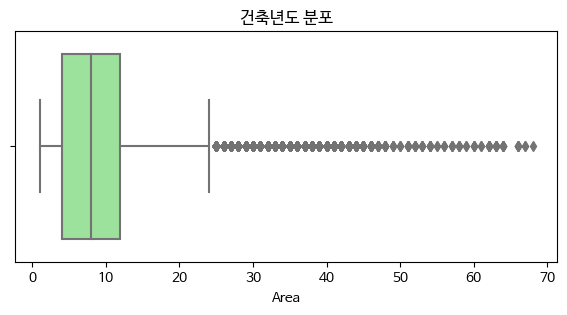

In [72]:
# Í∏∞ÌÉÄ Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï¥Î¥Ñ

pd.set_option('display.float_format', '{:.6f}'.format)

concat['Ï∏µ'].describe()

fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = train1, x = 'Ï∏µ', color='lightgreen')
plt.title('Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [ ]:
# sns.histplot(concat['Ïó∞Î©¥Ï†Å'], kde=True)
# plt.title('Ïó∞Î©¥Ï†Å')
# plt.xlabel('Í±¥Ï∂ïÎÖÑÎèÑ')
# plt.ylabel('year')
# plt.show()

In [58]:
concat.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'target', 'is_test', 'Ï£ºÏÜå',
       'x', 'y', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä', 'Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù', 'Íµ¨', 'Îèô', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ïó∞Î©¥Ï†Å', 'ÎåÄÏßÄÎ©¥Ï†Å', 'Í±¥ÌèêÏú®', 'Ïö©Ï†ÅÏú®', 'ÌèâÍ∑†Ï∏µÏàò', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Î©¥Ï†ÅÎ∂ÑÎ•ò'],
      dtype='object')

In [120]:
# ÌÉÄÏûÑÏä§ÌîåÎ¶ø Ï†ÑÏóê ÎÇ†ÏßúÎ≥ÑÎ°ú sortingÌï¥Î¥Ñ

concat.rename(columns={'Í≥ÑÏïΩÎÖÑ': 'year', 'Í≥ÑÏïΩÏõî': 'month', 'Í≥ÑÏïΩÏùº': 'day'}, inplace=True)
concat['Í≥ÑÏïΩÎÇ†Ïßú'] = pd.to_datetime(concat[['year', 'month', 'day']])

concat = concat.drop(['year', 'month', 'day'], axis=1)

# concat = concat.sort_values(by='Í≥ÑÏïΩÎÇ†Ïßú').reset_index(drop=True)

In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
concat = pd.read_csv('../data/base_dataset_4.csv', index_col=None)

In [3]:
concat['is_test'].value_counts()

0    699179
1      9272
Name: is_test, dtype: int64

In [4]:
str_columns = ['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä', 'Íµ¨', 'Îèô', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Í≥ÑÏïΩÎÖÑÏõî', 'Î©¥Ï†ÅÎ∂ÑÎ•ò']

concat[str_columns] = concat[str_columns].astype(str)
concat['Î©¥Ï†ÅÎ∂ÑÎ•ò'] = concat['Î©¥Ï†ÅÎ∂ÑÎ•ò'].astype(int)
# concat['Í≥ÑÏïΩÏõî'] = concat['Í≥ÑÏïΩÏõî'].astype(int)
concat['Í≥ÑÏïΩÎÇ†Ïßú'] = concat['Í≥ÑÏïΩÎÇ†Ïßú'].astype(str)

In [5]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Unnamed: 0', 'Ï†ÑÏö©Î©¥Ï†Å', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'target', 'is_test', 'x', 'y', 'Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ïó∞Î©¥Ï†Å', 'ÎåÄÏßÄÎ©¥Ï†Å', 'Í±¥ÌèêÏú®', 'Ïö©Ï†ÅÏú®', 'ÌèâÍ∑†Ï∏µÏàò', 'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Î©¥Ï†ÅÎ∂ÑÎ•ò']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï£ºÏÜå', 'Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä', 'Íµ¨', 'Îèô', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÎÇ†Ïßú']


In [ ]:

drop_col = ['Unnamed: ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Î≤àÏßÄ', ]

concat.drop(columns=)

In [6]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [7]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat, 'Ï†ÑÏö©Î©¥Ï†Å')

In [8]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

(699070, 27) (9272, 27)


In [16]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Unnamed: 0', 'Ï†ÑÏö©Î©¥Ï†Å', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'target', 'x', 'y', 'Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ïó∞Î©¥Ï†Å', 'ÎåÄÏßÄÎ©¥Ï†Å', 'Í±¥ÌèêÏú®', 'Ïö©Ï†ÅÏú®', 'ÌèâÍ∑†Ï∏µÏàò', 'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Î©¥Ï†ÅÎ∂ÑÎ•ò']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï£ºÏÜå', 'Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä', 'Íµ¨', 'Îèô', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÎÇ†Ïßú']


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:02<00:00,  5.22it/s]


In [17]:
from sklearn.model_selection import TimeSeriesSplit

In [18]:
assert dt_train.shape[1] == dt_test.shape[1] 

# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# TimeSeriesSplitÏùÑ ÌÜµÌï¥ ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàî
for train_index, val_index in tscv.split(X_train):
    X_train_1, X_val_1 = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_1, y_val_1 = y_train.iloc[train_index], y_train.iloc[val_index]

In [90]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2024)

In [245]:
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [246]:
y_val = y_val * X_val['Ï†ÑÏö©Î©¥Ï†Å']
pred = pred * X_val['Ï†ÑÏö©Î©¥Ï†Å']

In [247]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 4769.639578755779


In [19]:
#  XGBoost ÏÇ¨Ïö©

import xgboost as xgb

In [20]:
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         n_estimators=1000,  
                         learning_rate=0.1,  
                         max_depth=10,
                         random_state=1)

model.fit(X_train_1, y_train_1)

pred = model.predict(X_val_1)

# y_val_2 = y_val_1 * X_val_1['Ï†ÑÏö©Î©¥Ï†Å']
# pred_2 = pred * X_val_1['Ï†ÑÏö©Î©¥Ï†Å']

In [79]:
type(model)

xgboost.sklearn.XGBRegressor

In [21]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val_1, pred))}')

RMSE test: 3010.7670749227054


- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

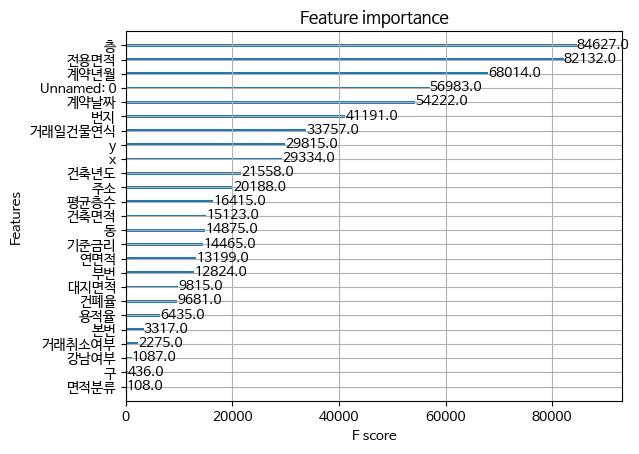

In [26]:
xgb.plot_importance(model)
plt.show()

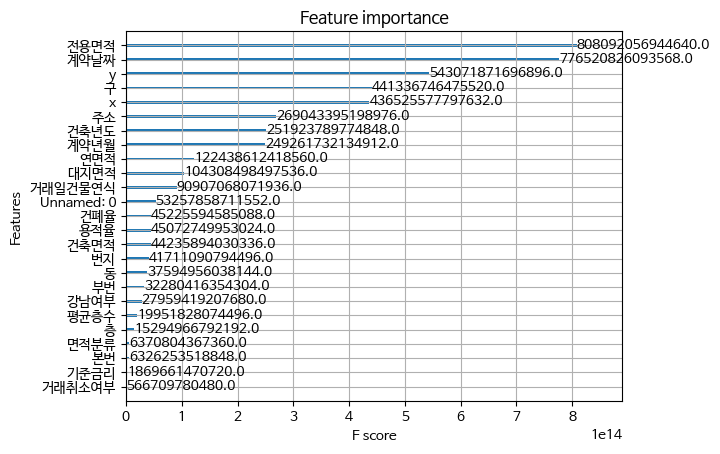

In [24]:
xgb.plot_importance(model, importance_type='total_gain')
plt.show()

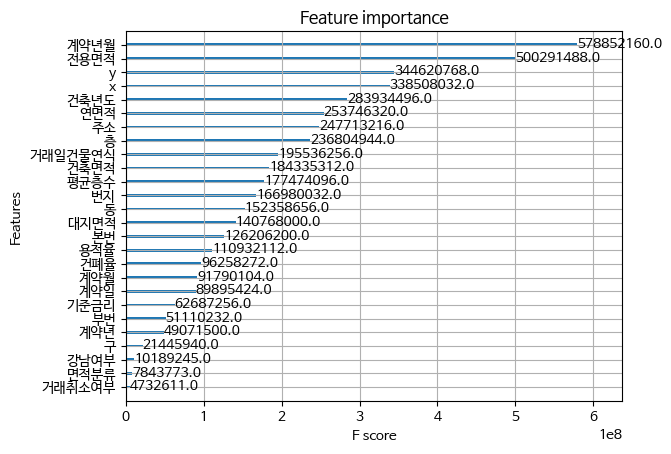

In [33]:
xgb.plot_importance(model, importance_type='total_cover')
plt.show()


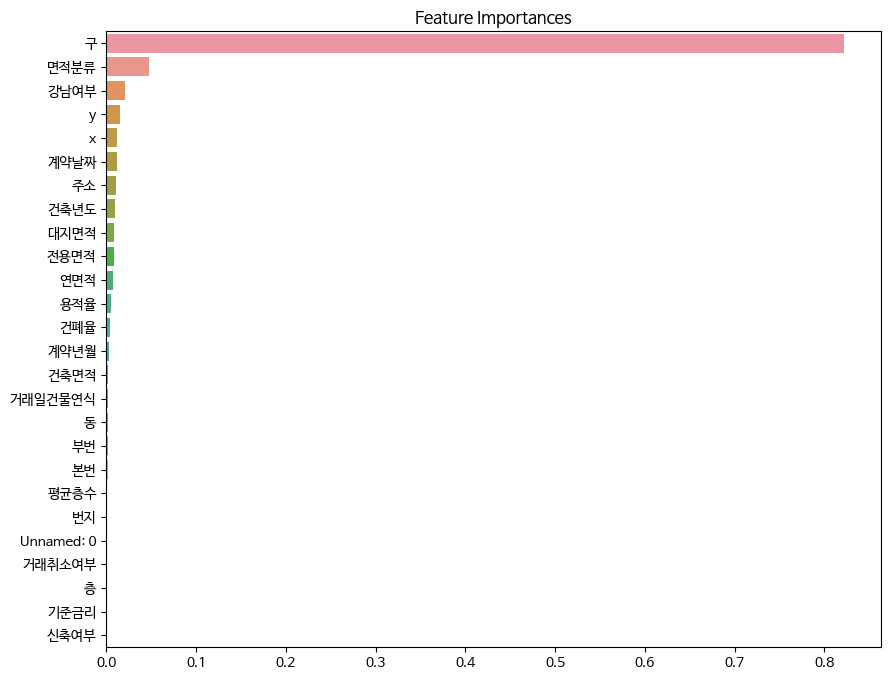

In [27]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [42]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('./temp/saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [30]:
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val_1, y_val_1)
eli5.show_weights(perm, feature_names = X_val_1.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [31]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val_1['target'] = y_val_1
X_val_1['pred'] = pred

In [32]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val_1['target'], X_val_1['pred'])
X_val_1['error'] = squared_errors

In [33]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val_1.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [34]:
X_val_sort.head()

Unnamed: 0    Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à    Ï†ÑÏö©Î©¥Ï†Å  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    Ï£ºÏÜå           x  \
640384      852135  2812   801   1  114.96  5  1994  6742  126.954929   
619598      826736  4821  1222   1  107.47  1  1973  4743  126.989036   
644300      856879  1615   576   1  115.04  7  2010  7631  126.980637   
649469      863031  3665   971   1  106.22  9  1981   323  127.044063   
649549      863181  3396   904   1  111.50  9  1980   317  127.035440   

                y  ...         Í±¥ÌèêÏú®          Ïö©Ï†ÅÏú®       ÌèâÍ∑†Ï∏µÏàò  Í≥ÑÏïΩÎÖÑÏõî  Í∏∞Ï§ÄÍ∏àÎ¶¨  Î©¥Ï†ÅÎ∂ÑÎ•ò  \
640384  37.525218  ...   94.940000  1587.300000   4.819031    21  2.50     4   
619598  37.505354  ...  295.753665  3116.907864   5.160202    28  2.50     4   
644300  37.559126  ...   52.810000   970.680000  29.504687    24  2.50     4   
649469  37.529126  ...  297.238369  3138.077428  12.631906    15  2.75     4   
649549  37.531214  ...  299.934718  3177.075452  11.455064    13  2.75     4   

        Í≥ÑÏïΩÎÇ†Ïßú    target           pred         error  
640384   659  150500.0   88164.414062  3.885725e+09  
619598   871  120000.0  181089.218750  3.731893e+09  
644300   752   37500.0   95000.773438  3.306339e+09  
649469   455   60771.0  116362.835938  3.090452e+09  
649549   423  160000.0  105394.289062  2.981784e+09  

[5 rows x 29 columns]

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [36]:
X_val_sort_top100 = X_val_1.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val_1.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [37]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [39]:
display(error_top100.head())
display(best_top100.head())

Unnamed: 0   Î≤àÏßÄ   Î≥∏Î≤à Î∂ÄÎ≤à    Ï†ÑÏö©Î©¥Ï†Å  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ                  Ï£ºÏÜå  \
640384      852135  395  395  0  114.96  5  1994   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ Ïù¥Ï¥åÎèô 395   
619598      826736  757  757  0  107.47  1  1973   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨Îèô 757   
644300      856879  206  206  0  115.04  7  2010  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ ÌöåÌòÑÎèô1Í∞Ä 206   
649469      863031  528  528  0  106.22  9  1981  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏïïÍµ¨Ï†ïÎèô 528   
649549      863181  481  481  0  111.50  9  1980  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏïïÍµ¨Ï†ïÎèô 481   

                 x          y  ...         Í±¥ÌèêÏú®          Ïö©Ï†ÅÏú®       ÌèâÍ∑†Ï∏µÏàò  \
640384  126.954929  37.525218  ...   94.940000  1587.300000   4.819031   
619598  126.989036  37.505354  ...  295.753665  3116.907864   5.160202   
644300  126.980637  37.559126  ...   52.810000   970.680000  29.504687   
649469  127.044063  37.529126  ...  297.238369  3138.077428  12.631906   
649549  127.035440  37.531214  ...  299.934718  3177.075452  11.455064   

          Í≥ÑÏïΩÎÖÑÏõî  Í∏∞Ï§ÄÍ∏àÎ¶¨ Î©¥Ï†ÅÎ∂ÑÎ•ò        Í≥ÑÏïΩÎÇ†Ïßú    target           pred         error  
640384  201310  2.50    4  2013-10-22  150500.0   88164.414062  3.885725e+09  
619598  201405  2.50    4  2014-05-22  120000.0  181089.218750  3.731893e+09  
644300  201401  2.50    4  2014-01-23   37500.0   95000.773438  3.306339e+09  
649469  201304  2.75    4  2013-04-01   60771.0  116362.835938  3.090452e+09  
649549  201302  2.75    4  2013-02-28  160000.0  105394.289062  2.981784e+09  

[5 rows x 29 columns]

Unnamed: 0      Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à    Ï†ÑÏö©Î©¥Ï†Å   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ                    Ï£ºÏÜå  \
687691      907532  119-27   119  27  52.090  10  2012  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïò§Í∏àÎèô 119-27   
582654      784725    1461  1461   0  49.560  10  1992    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ Í∞ÄÏñëÎèô 1461   
665594      881769     941   941   0  84.917   7  2005     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ ÏõîÍ≥ÑÎèô 941   
592282      795944     478   478   0  84.960  12  2000     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í∞úÎ¥âÎèô 478   
585182      787653     685   685   0  84.830   7  2004    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ ÎÇ¥Î∞úÏÇ∞Îèô 685   

                 x          y  ...         Í±¥ÌèêÏú®          Ïö©Ï†ÅÏú®       ÌèâÍ∑†Ï∏µÏàò  \
687691  127.139334  37.503325  ...   28.870000   199.580000   6.913789   
582654  126.847174  37.570495  ...  238.400000  1991.520000   8.731474   
665594  127.058919  37.623149  ...  296.450284  3126.854555  10.611010   
592282  126.851940  37.484679  ...  303.243645  3223.830461  14.299859   
585182  126.832029  37.553675  ...   27.100000   249.750000  11.765541   

          Í≥ÑÏïΩÎÖÑÏõî  Í∏∞Ï§ÄÍ∏àÎ¶¨ Î©¥Ï†ÅÎ∂ÑÎ•ò        Í≥ÑÏïΩÎÇ†Ïßú   target          pred     error  
687691  201304  2.75    2  2013-04-16  34500.0  34502.367188  5.603577  
582654  201403  2.50    1  2014-03-20  24000.0  23997.666016  5.447483  
665594  201304  2.75    3  2013-04-24  32000.0  32002.322266  5.392918  
592282  201409  2.50    3  2014-09-20  32000.0  31997.728516  5.159641  
585182  201409  2.50    3  2014-09-17  35000.0  34997.792969  4.870987  

[5 rows x 29 columns]

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

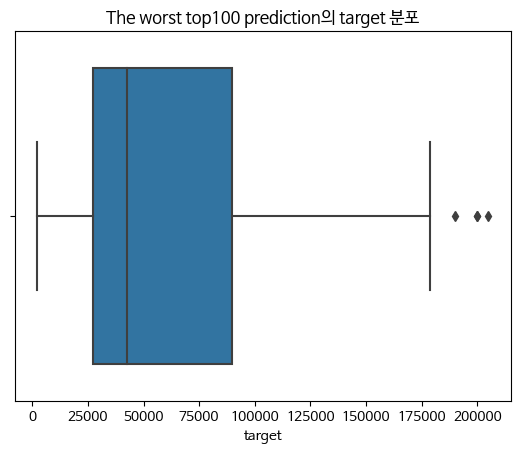

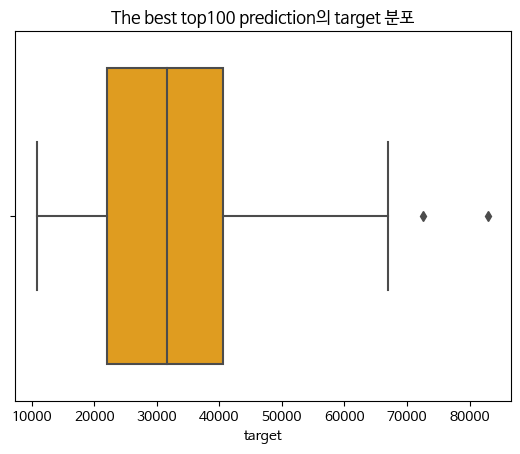

In [40]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

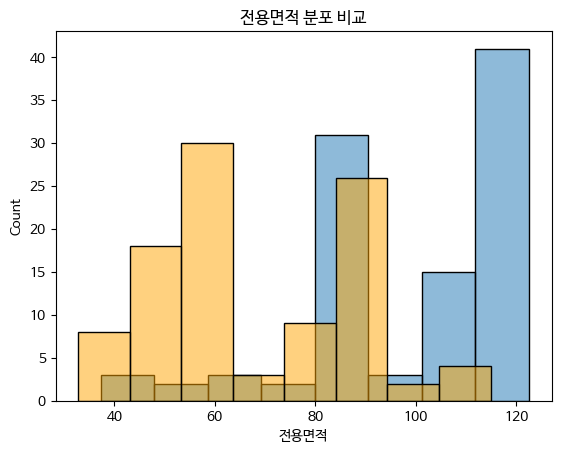

In [41]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [80]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à      Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  Ï£ºÏÜå           x          y  \
1179487  4284  1115   2   79.9700   26   5  1987  32  127.056841  37.476283   
1179488  4260  1108   2  108.2017   15  10  2021  25  127.057251  37.484828   

         ...       Í±¥Ï∂ïÎ©¥Ï†Å         Ïó∞Î©¥Ï†Å           ÎåÄÏßÄÎ©¥Ï†Å         Í±¥ÌèêÏú®          Ïö©Ï†ÅÏú®  \
1179487  ...  4551.3300  22305.9300  171124.438613  297.162458  3139.237949   
1179488  ...  2706.0317  31893.0189  164008.524870  297.009766  3135.924895   

             ÌèâÍ∑†Ï∏µÏàò  target  Í≥ÑÏïΩÎÖÑÏõî  Í∏∞Ï§ÄÍ∏àÎ¶¨  Î©¥Ï†ÅÎ∂ÑÎ•ò  
1179487   4.90097       0   198   3.5     3  
1179488  11.78590       0   199   3.5     4  

[2 rows x 28 columns]

In [56]:
dt_test1.head(2)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à     ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0   Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±   79.9700  202307   26   5  1987   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  651-1  651.0  1.0  Í∞úÌè¨ÎçîÏÉµÌä∏Î¶¨Ïóê  108.2017  202308   15  10  2021   

   ... Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº  \
0  ...      ÏßÅÏòÅ  4858.00  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0   
1  ...      ÏúÑÌÉÅ  2724.46  305.0                  ÏùòÎ¨¥  2022-02-23 13:01:10.0   

  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú         Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  
0      Y       N  127.057210  37.476763  2022-11-17 10:19:06.0  
1      Y       N  127.056394  37.484892  2022-02-23 11:05:05.0  

[2 rows x 51 columns]

In [43]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('./temp/saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [97]:
type(model)

xgboost.sklearn.XGBRegressor

In [45]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9272 entries, 699179 to 708450
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9272 non-null   int64  
 1   Î≤àÏßÄ          9272 non-null   int64  
 2   Î≥∏Î≤à          9272 non-null   int64  
 3   Î∂ÄÎ≤à          9272 non-null   int64  
 4   Ï†ÑÏö©Î©¥Ï†Å        9272 non-null   float64
 5   Ï∏µ           9272 non-null   int64  
 6   Í±¥Ï∂ïÎÖÑÎèÑ        9272 non-null   int64  
 7   target      9272 non-null   int64  
 8   Ï£ºÏÜå          9272 non-null   int64  
 9   x           9272 non-null   float64
 10  y           9272 non-null   float64
 11  Í±∞ÎûòÏ∑®ÏÜåÏó¨Î∂Ä      9272 non-null   int64  
 12  Í±∞ÎûòÏùºÍ±¥Î¨ºÏó∞Ïãù     9272 non-null   int64  
 13  Íµ¨           9272 non-null   int64  
 14  Îèô           9272 non-null   int64  
 15  Í∞ïÎÇ®Ïó¨Î∂Ä        9272 non-null   int64  
 16  Ïã†Ï∂ïÏó¨Î∂Ä        9272 non-null   int64  
 17  Í±¥Ï∂ïÎ©¥Ï†Å        92

In [44]:
dt_test.head()

Unnamed: 0    Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à      Ï†ÑÏö©Î©¥Ï†Å   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  target  Ï£ºÏÜå  \
699179     1165613  4245  1113   2   79.9700   5  1987       0  32   
699180     1165614  4221  1106   2  108.2017  10  2021       0  25   
699181     1165615  4222  1107   1  161.0000  15  1984       0  26   
699182     1165616  4222  1107   1  133.4600  14  1984       0  26   
699183     1165617  4222  1107   1  104.4300   6  1984       0  26   

                 x  ...       Í±¥Ï∂ïÎ©¥Ï†Å         Ïó∞Î©¥Ï†Å           ÎåÄÏßÄÎ©¥Ï†Å         Í±¥ÌèêÏú®  \
699179  127.056841  ...  4551.3300  22305.9300  171357.334166  297.555783   
699180  127.057251  ...  2706.0317  31893.0189  164240.992757  297.402886   
699181  127.056014  ...  4484.9400  61999.0800  183006.694768  299.033944   
699182  127.056014  ...  4484.9400  61999.0800  183006.694768  299.033944   
699183  127.056014  ...  4484.9400  61999.0800  183006.694768  299.033944   

                Ïö©Ï†ÅÏú®       ÌèâÍ∑†Ï∏µÏàò  Í≥ÑÏïΩÎÖÑÏõî  Í∏∞Ï§ÄÍ∏àÎ¶¨  Î©¥Ï†ÅÎ∂ÑÎ•ò  Í≥ÑÏïΩÎÇ†Ïßú  
699179  3143.834230   4.900970   138   3.5     3  4190  
699180  3140.519263  11.785900   139   3.5     4  4210  
699181  3163.697455  13.823837   138   3.5     4  4192  
699182  3163.697455  13.823837   139   3.5     4  4205  
699183  3163.697455  13.823837   139   3.5     4  4213  

[5 rows x 27 columns]

In [99]:
print(real_test_pred.shape)
print(dt_test['Ï†ÑÏö©Î©¥Ï†Å'].shape)

(9390,)
(9390,)


In [46]:
%%time
X_test = dt_test.drop(['target'], axis=1)

real_test_pred = model.predict(X_test)
# real_test_pred = real_test_pred * dt_test['Ï†ÑÏö©Î©¥Ï†Å'].values

CPU times: user 530 ms, sys: 83 ¬µs, total: 530 ms
Wall time: 65.3 ms


In [47]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([187669.66, 265536.3 , 235682.11, ...,  86014.62,  71421.03,
        75809.2 ], dtype=float32)

In [48]:
plt.hist(dt['Ï†ÑÏö©Î©¥Ï†Å'], bins=50, alpha=0.5, label='Train')
plt.hist(dt_test['Ï†ÑÏö©Î©¥Ï†Å'], bins=50, alpha=0.5, label='Test')
plt.legend()
plt.show()

NameError: name 'dt' is not defined

## 7. Output File Save

In [49]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('./temp/output.csv', index=False)